In [51]:
import pandas as pd

# Read each sheet of the Excel file into separate DataFrames
file_path = "..\\DataCleaning\\resources\\complete_stock_data.csv"
# Read the CSV file into a DataFrame
final_df = pd.read_csv(file_path)
final_df['Dividends'] = 0
final_df.head()

,ASX Code,Security Group Code,Issuer Full Name,Product Description,Last Price($),Business Date,Year,Company Name,Sub-Industry,Splits,Dividends
0,1AD,EQY,ADALTA LIMITED ...,ORDINARY,0.280,20170630,2017,Adalta Limited Ordinary,Biotechnology & Medical Research,1.0,0
1,1AG,EQY,ALTERRA LIMITED ...,ORDINARY,0.024,20170630,2017,Alterra Limited Ordinary,Environmental Services & Equipment,1.0,0
2,3DP,EQY,POINTERRA LIMITED ...,ORDINARY,0.025,20170629,2017,Pointerra Limited Ordinary,Software,1.0,0
3,3PL,EQY,3P LEARNING LIMITED.. ...,ORDINARY,1.045,20170630,2017,3P Learning Limited. Ordinary,Software,1.0,0
4,4DS,EQY,4DS MEMORY LIMITED ...,ORDINARY,0.037,20170630,2017,4DS Memory Limited Ordinary,Computer Hardware,1.0,0


In [52]:
final_df.head()

,ASX Code,Security Group Code,Issuer Full Name,Product Description,Last Price($),Business Date,Year,Company Name,Sub-Industry,Splits,Dividends
0,1AD,EQY,ADALTA LIMITED ...,ORDINARY,0.280,20170630,2017,Adalta Limited Ordinary,Biotechnology & Medical Research,1.0,0
1,1AG,EQY,ALTERRA LIMITED ...,ORDINARY,0.024,20170630,2017,Alterra Limited Ordinary,Environmental Services & Equipment,1.0,0
2,3DP,EQY,POINTERRA LIMITED ...,ORDINARY,0.025,20170629,2017,Pointerra Limited Ordinary,Software,1.0,0
3,3PL,EQY,3P LEARNING LIMITED.. ...,ORDINARY,1.045,20170630,2017,3P Learning Limited. Ordinary,Software,1.0,0
4,4DS,EQY,4DS MEMORY LIMITED ...,ORDINARY,0.037,20170630,2017,4DS Memory Limited Ordinary,Computer Hardware,1.0,0


In [53]:
final_df["ASX Code"].nunique()

1858

In [54]:
final_df["ASX Code"].count()

11745

In [55]:
# Try to apply Splits on the prices of previous years so that we can apply it on the price

# Step 1: Identify Split Events
split_events = final_df[final_df['Splits'] != 1]  # Only select rows where Splits is not equal to 1

# Step 2: Adjust Historical Prices
for _, split_event in split_events.iterrows():
    split_date = split_event['Year']
    split_ratio = split_event['Splits']
    asx_code = split_event['ASX Code']
    
    # Adjust historical prices for the ASX code before the split date
    final_df.loc[(final_df['ASX Code'] == asx_code) & (final_df['Year'] < split_date), 'Last Price($)'] /= split_ratio


In [56]:



# Group data by 'ASX Code' and 'Year', and sort each group by 'Year' before finding the first and last prices
first_last_prices = final_df.groupby(['ASX Code', 'Year']).apply(lambda x: x.sort_values('Year')).reset_index(drop=True).groupby('ASX Code').agg({'Year': ['first', 'last'], 'Last Price($)': ['first', 'last'], 'Dividends': 'sum', 'Sub-Industry': 'last'}).reset_index()

# Rename the columns for clarity
first_last_prices.columns = ['ASX Code', 'First Year', 'Last Year', 'First Price', 'Last Price', 'Total Dividends', 'Sub-Industry']

first_last_prices


,ASX Code,First Year,Last Year,First Price,Last Price,Total Dividends,Sub-Industry
0,14D,2019,2023,0.295,0.048,0,Electrical Components & Equipment
1,1AD,2017,2023,0.280,0.024,0,Biotechnology & Medical Research
2,1AE,2022,2023,0.205,0.063,0,Uranium
3,1AG,2016,2023,0.052,0.010,0,Environmental Services & Equipment
4,1MC,2022,2023,0.017,0.008,0,Specialty Mining & Metals
...,...,...,...,...,...,...,...
1853,ZLD,2017,2023,0.074,1.510,0,Biotechnology & Medical Research
1854,ZMI,2017,2023,0.005,0.020,0,Integrated Mining
1855,ZMM,2021,2023,0.014,0.031,0,Electrical Components & Equipment
1856,ZNC,2014,2023,0.085,0.090,0,Integrated Mining


In [57]:
# Calculate total return (price appreciation + dividends)
first_last_prices['Total Return'] = first_last_prices['Last Price'] - first_last_prices['First Price'] + first_last_prices['Total Dividends']
# Normalize total return
first_last_prices['Normalized Total Return'] = first_last_prices['Total Return'] / first_last_prices['First Price']

# Sort ASX codes based on normalized total return
sorted_data = first_last_prices.sort_values(by='Normalized Total Return', ascending=False)

# Create report
top_gainers_report = sorted_data[['ASX Code', 'Total Return', 'Normalized Total Return', 'First Price', 'Last Price', 'Sub-Industry','Total Dividends']]

# Display or export the report as needed
top_gainers_report.head(10)
#top_gainers_report.loc[(top_gainers_report["ASX Code"]=="MTB") | (top_gainers_report["ASX Code"]=="OBL") ,['ASX Code','First Price', 'Total Return',   'Last Price', 'Total Dividends', 'Sub-Industry']]  # Display top 10 gainers


,ASX Code,Total Return,Normalized Total Return,First Price,Last Price,Sub-Industry,Total Dividends
522,DEG,1.344,1344.000000,0.001,1.345,Gold,0
1117,MOT,1.998,999.000000,0.002,2.000,Closed End Funds,0
811,HLS,3.174,529.000000,0.006,3.180,Healthcare Facilities & Services,0
746,GLN,0.868,434.000000,0.002,0.870,Specialty Mining & Metals,0
176,ARX,0.922,307.333333,0.003,0.925,"Medical Equipment, Supplies & Dist'n",0
478,CTT,3.099,281.727273,0.011,3.110,Apparel & Accessories Retailers,0
1514,SEQ,0.533,266.500000,0.002,0.535,Investment Management & Fund Operators,0
1785,WBT,5.051,265.842105,0.019,5.070,Semiconductors,0
1248,OBL,2.610,261.000000,0.010,2.620,Corporate Financial Services,0
214,AVD,0.737,245.666667,0.003,0.740,Construction & Engineering,0


In [58]:
# Display or export the report as needed
top_gainers_report.tail(10)  # Display top 10 gainers


,ASX Code,Total Return,Normalized Total Return,First Price,Last Price,Sub-Industry,Total Dividends
222,AVW,-0.2480,-0.992000,0.250,0.0020,Gold,0
1715,TTT,-2.6820,-0.993333,2.700,0.0180,Industrial Machinery & Equipment,0
142,AO1,-0.1590,-0.993750,0.160,0.0010,Software,0
397,CFO,-0.3230,-0.993846,0.325,0.0020,Commodity Chemicals,0
53,ADR,-0.4975,-0.995000,0.500,0.0025,Advanced Medical Equipment & Technology,0
619,ENV,-1.3550,-0.996324,1.360,0.0050,Precious Metals & Minerals,0
568,DXN,-0.2740,-0.996364,0.275,0.0010,IT Services & Consulting,0
474,CTN,-1.0220,-0.997073,1.025,0.0030,Integrated Mining,0
196,ATU,-1.7050,-0.997076,1.710,0.0050,Steel,0
231,AXP,-0.5285,-0.997170,0.530,0.0015,Oil & Gas Exploration and Production,0


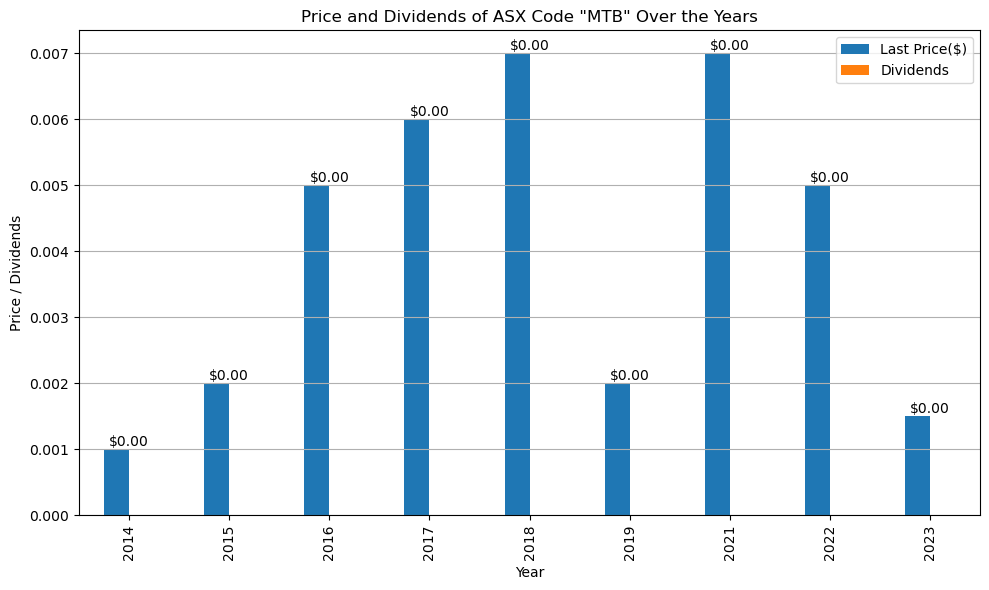

In [59]:

final_df.loc[(final_df['ASX Code'] == 'MTB') & (final_df['Year'] == 2016), 'Splits'] = 2

final_df.loc[(final_df['ASX Code'] == 'MTB') & (final_df['Year'] == 2021), 'Splits'] = 1.3

import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'final_df' with columns: 'Year', 'ASX Code', 'Last Price($)', 'Dividends'

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'MTB'].copy()

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')[['Last Price($)', 'Dividends']].mean()

# Remove negative values from Last Price
mtb_data_agg = mtb_data_agg[mtb_data_agg['Last Price($)'] >= 0]

# Plot bar plot
ax = mtb_data_agg.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price / Dividends')
plt.title('Price and Dividends of ASX Code "MTB" Over the Years')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()

# Show dividends as text next to each bar
for i, (index, row) in enumerate(mtb_data_agg.iterrows()):
    ax.text(i, row['Last Price($)'], f"${row['Dividends']:.2f}", ha='center', va='bottom')

plt.show()






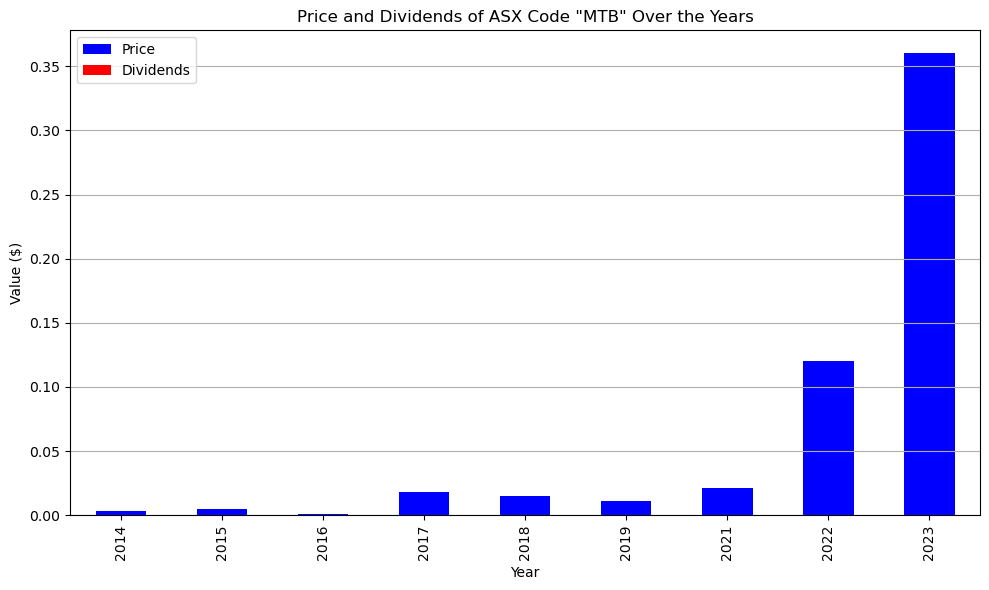

In [60]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'final_df' with columns: 'Year', 'ASX Code', 'Last Price($)', 'Dividends'

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'LIN'].copy()

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')[['Last Price($)', 'Dividends']].mean()

# Remove negative values from Last Price
mtb_data_agg = mtb_data_agg[mtb_data_agg['Last Price($)'] >= 0]

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bar plot
mtb_data_agg.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value ($)')
plt.title('Price and Dividends of ASX Code "MTB" Over the Years')

# Add legend
plt.legend(['Price', 'Dividends'], loc='upper left')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


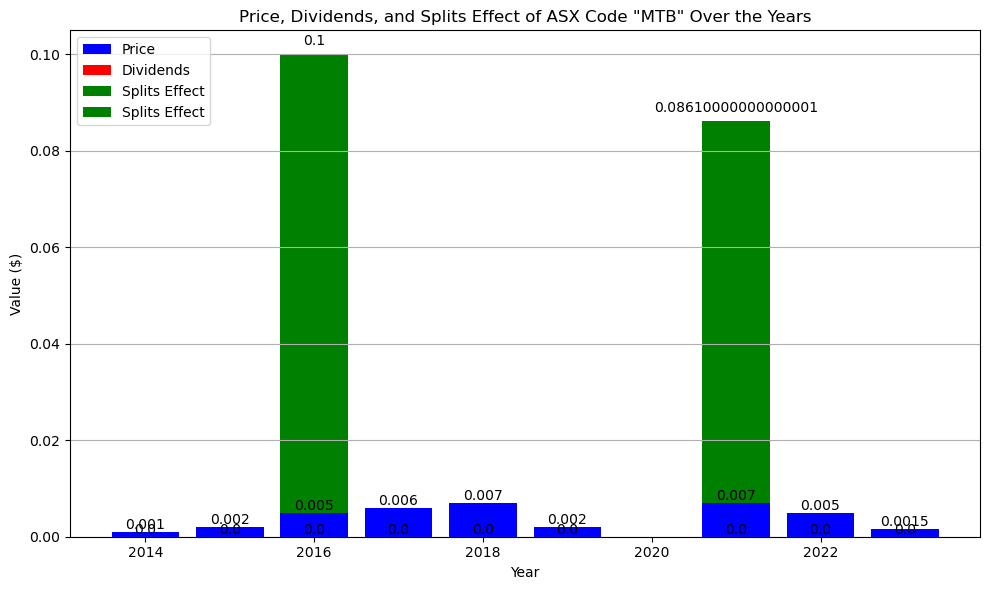

In [61]:
final_df.loc[(final_df['ASX Code'] == 'MTB') & (final_df['Year'] == 2016), 'Splits'] = 20

final_df.loc[(final_df['ASX Code'] == 'MTB') & (final_df['Year'] == 2021), 'Splits'] = 12.3

import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'final_df' with columns: 'Year', 'ASX Code', 'Last Price($)', 'Dividends', 'Splits'

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'MTB'].copy()

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')[['Last Price($)', 'Dividends', 'Splits']].mean()

# Remove negative values from Last Price
mtb_data_agg = mtb_data_agg[mtb_data_agg['Last Price($)'] >= 0]

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Price
price_bar = ax.bar(mtb_data_agg.index, mtb_data_agg['Last Price($)'], color='blue', label='Price')

# Plot Dividends on top of Price
dividends_bar = ax.bar(mtb_data_agg.index, mtb_data_agg['Dividends'], bottom=mtb_data_agg['Last Price($)'], color='red', label='Dividends')

# Iterate over each year where splits occurred and add an additional bar section on top of dividends representing the effect of splits
for year, splits in mtb_data_agg['Splits'].items():
    if splits > 1:
        last_price = mtb_data_agg.loc[year, 'Last Price($)']
        splits_effect = (splits - 1) * last_price
        ax.bar(year, splits_effect, bottom=mtb_data_agg.loc[year, 'Dividends'] + mtb_data_agg.loc[year, 'Last Price($)'], color='green', label='Splits Effect')

# Add labels on top of each section
for bars in [price_bar, dividends_bar]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 0),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for Splits Effect bars
for year, splits in mtb_data_agg['Splits'].items():
    if splits > 1:
        last_price = mtb_data_agg.loc[year, 'Last Price($)']
        splits_effect = (splits - 1) * last_price
        height = mtb_data_agg.loc[year, 'Dividends'] + mtb_data_agg.loc[year, 'Last Price($)'] + splits_effect
        ax.annotate('{}'.format(height),
                    xy=(year, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value ($)')
plt.title('Price, Dividends, and Splits Effect of ASX Code "MTB" Over the Years')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()





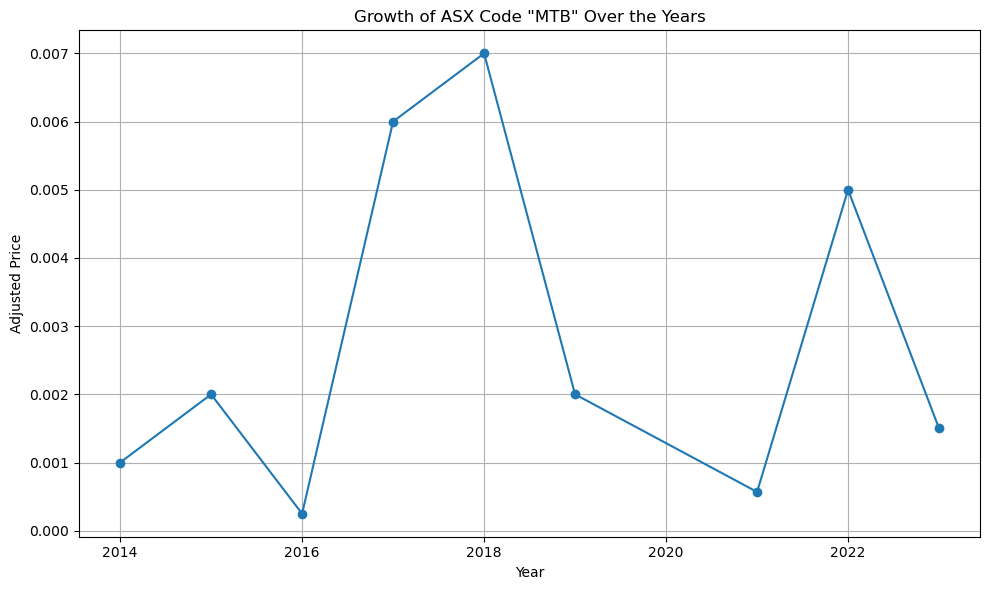

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for ASX Code "MTB"
mtb_data = final_df[final_df['ASX Code'] == 'MTB'].copy()

# Calculate adjusted price for MTB
mtb_data['Adjusted Price'] = mtb_data['Last Price($)']
for _, row in mtb_data.iterrows():
    splits = row['Splits']
    dividends = row['Dividends']
    if splits != 1:
        mtb_data.loc[mtb_data.index == row.name, 'Adjusted Price'] /= splits
    mtb_data.loc[mtb_data.index == row.name, 'Adjusted Price'] += dividends

# Convert "Adjusted Price" column to numeric
mtb_data['Adjusted Price'] = pd.to_numeric(mtb_data['Adjusted Price'], errors='coerce')

# Aggregate data by year
mtb_data_agg = mtb_data.groupby('Year')['Adjusted Price'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mtb_data_agg.index, mtb_data_agg.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Adjusted Price')
plt.title('Growth of ASX Code "MTB" Over the Years')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




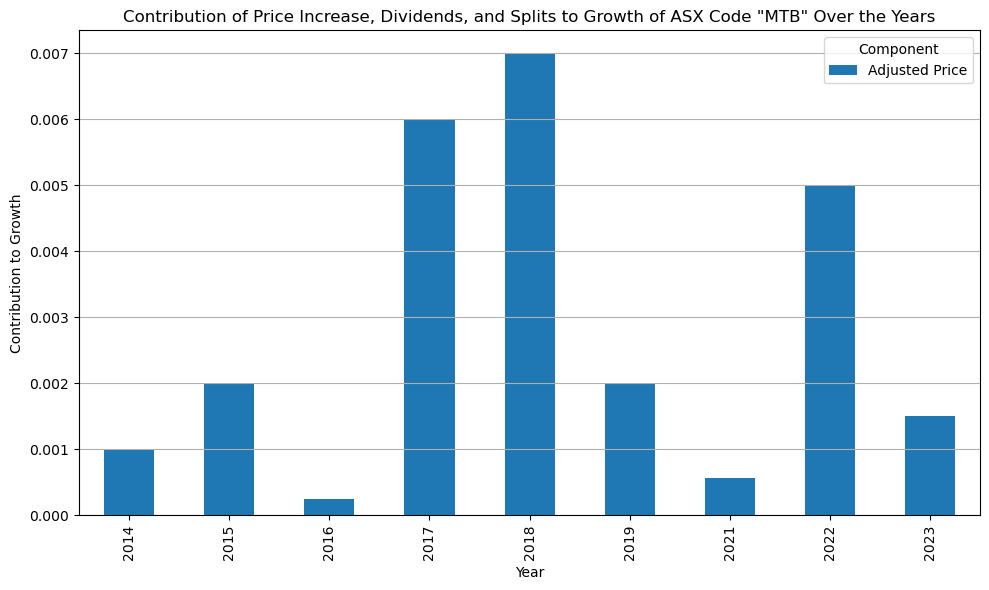

In [63]:
# Plot stacked bar plot if mtb_data_agg is not empty
if not mtb_data_agg.empty:
    mtb_data_agg.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Contribution to Growth')
    plt.title('Contribution of Price Increase, Dividends, and Splits to Growth of ASX Code "MTB" Over the Years')

    # Show the plot
    plt.legend(title='Component')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for ASX Code 'MTB'.")


In [64]:
top_sub_industries = top_gainers_report.groupby('Sub-Industry')['Normalized Total Return'].mean()
top_sub_industries = top_sub_industries.sort_values(ascending=False)

In [65]:
top_sub_industries

Sub-Industry
Closed End Funds                     110.812036
Semiconductors                        53.947354
Corporate Financial Services          38.289246
Apparel & Accessories Retailers       32.384169
Communications & Networking           26.599736
                                        ...    
Marine Freight & Logistics            -0.788595
Residential REITs                     -0.838440
Non-Alcoholic Beverages               -0.859155
Semiconductor Equipment & Testing     -0.890196
Toys & Children's Products            -0.900000
Name: Normalized Total Return, Length: 127, dtype: float64

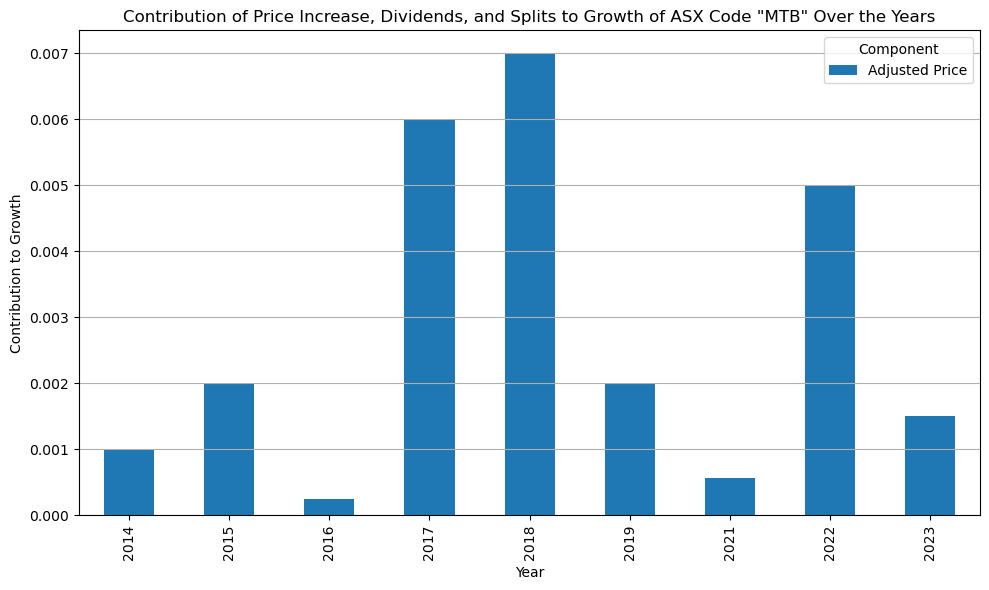

In [66]:
# Plot stacked bar plot if mtb_data_agg is not empty
if not mtb_data_agg.empty:
    mtb_data_agg.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Contribution to Growth')
    plt.title('Contribution of Price Increase, Dividends, and Splits to Growth of ASX Code "MTB" Over the Years')

    # Show the plot
    plt.legend(title='Component')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for ASX Code 'MTB'.")

